# kiểm tra phân phối nhãn : check distribution of labels

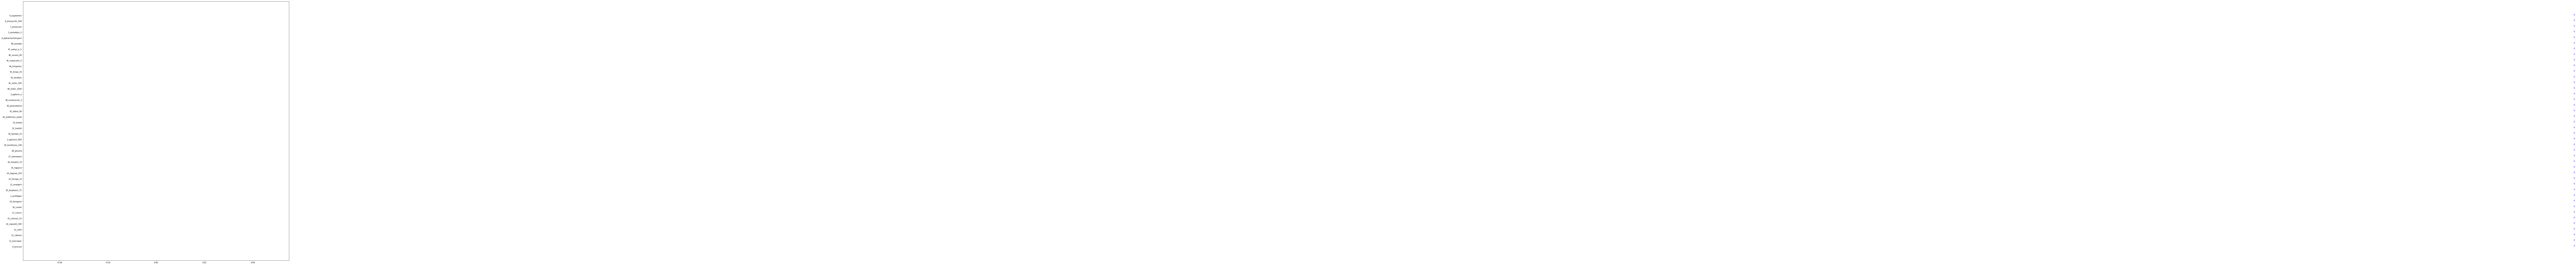

In [38]:
import os
root = "DATA_sorted\\v0_v10_raw\\images"
folder_name_list = os.listdir(root)
distribution_list = []
for folder_name in folder_name_list:
    folder_path = os.path.join(root, folder_name)
    file_name_list = os.listdir(folder_path)
    distribution_list.append((folder_name, len(file_name_list)))

dis_sorted = sorted(distribution_list, key=lambda x: x[1], reverse=True)
names = [x[0] for x in dis_sorted]
values  = [x[1] for x in dis_sorted]
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))


plt.barh(names, values)
for i, v in enumerate(values):
    plt.text(v + 1, i, str(v), color='blue')
plt.show()
   

# Chia dữ liệu theo tỷ lệ 0.6 0.2 0.2

In [42]:
root_source = "DATA_sorted\\v0_v10_raw"
root_target = "DATA_sorted\\v0_v10_3folders"

folder_type_dict  = {"train":0.6, "valid":0.5, "test":1} # 0.5*0,4 = 0.2


folder_type = "test"
division_ratio = folder_type_dict[folder_type]

In [43]:
import random
import shutil
target_folder_type_path = os.path.join(root_target, folder_type)
if not os.path.exists(target_folder_type_path):
    os.mkdir(target_folder_type_path)
target_folder_type_image_name_path = "{}/images".format(target_folder_type_path)
target_folder_type_label_name_path = "{}/labels".format(target_folder_type_path)
if not os.path.exists(target_folder_type_image_name_path):
    os.mkdir(target_folder_type_image_name_path)
    os.mkdir(target_folder_type_label_name_path)



# print("folder_type_path: {}".format(folder_type_path))
# print("folder_type_image_name_path: {}".format(folder_type_image_name_path))
# print("folder_type_label_name_path: {}".format(folder_type_label_name_path))

folder_image_name_list = os.listdir("{}/images".format(root_source))

for folder_image_name in folder_image_name_list:
    folder_image_path = os.path.join("{}/images".format(root_source), folder_image_name)
    image_name_list = os.listdir(folder_image_path)
    sample_image_list = random.sample(image_name_list, round(len(image_name_list) * division_ratio))
    
    folder_type_image_path = "{}/{}".format(target_folder_type_path, folder_image_name)

    

    for sample_image_name in sample_image_list:
        source_image_path = "{}/images/{}/{}".format(root_source, folder_image_name, sample_image_name)
        source_label_path = "{}/labels/{}/{}".format(root_source, folder_image_name, sample_image_name.replace(".jpg", ".txt"))
        
        target_folder_image_path = "{}/images/{}".format(target_folder_type_path, folder_image_name)
        target_folder_label_path = "{}/labels/{}".format(target_folder_type_path, folder_image_name)
        
        
        
        if not os.path.exists(target_folder_image_path):
            os.mkdir(target_folder_image_path)
            os.mkdir(target_folder_label_path)

        target_image_path = "{}/images/{}/{}".format(target_folder_type_path, folder_image_name, sample_image_name)
        target_label_path = "{}/labels/{}/{}".format(target_folder_type_path, folder_image_name, sample_image_name.replace(".jpg", ".txt"))


        print("source_image_path: {}".format(source_image_path))
        print("source_label_path: {}".format(source_label_path))
        print("target_folder_image_path: {}".format(target_folder_image_path))
        print("target_folder_label_path: {}".format(target_folder_label_path))
        
        print("target_image_path: {}".format(target_image_path))
        print("target_label_path: {}".format(target_label_path))

        shutil.move(source_image_path, target_image_path)
        shutil.move(source_label_path, target_label_path)





    

source_image_path: DATA_sorted\v0_v10_raw/images/0_acecyst/0_acecyst__(3).jpg
source_label_path: DATA_sorted\v0_v10_raw/labels/0_acecyst/0_acecyst__(3).txt
target_folder_image_path: DATA_sorted\v0_v10_3folders\test/images/0_acecyst
target_folder_label_path: DATA_sorted\v0_v10_3folders\test/labels/0_acecyst
target_image_path: DATA_sorted\v0_v10_3folders\test/images/0_acecyst/0_acecyst__(3).jpg
target_label_path: DATA_sorted\v0_v10_3folders\test/labels/0_acecyst/0_acecyst__(3).txt
source_image_path: DATA_sorted\v0_v10_raw/images/0_acecyst/0_acecyst__(8).jpg
source_label_path: DATA_sorted\v0_v10_raw/labels/0_acecyst/0_acecyst__(8).txt
target_folder_image_path: DATA_sorted\v0_v10_3folders\test/images/0_acecyst
target_folder_label_path: DATA_sorted\v0_v10_3folders\test/labels/0_acecyst
target_image_path: DATA_sorted\v0_v10_3folders\test/images/0_acecyst/0_acecyst__(8).jpg
target_label_path: DATA_sorted\v0_v10_3folders\test/labels/0_acecyst/0_acecyst__(8).txt
source_image_path: DATA_sorted\v

# Move to v0_v10_yolo


In [14]:
# get all image, label in each folder train, valid, test in v0_v10_3folders

root_source = "DATA_sorted\\v0_v10_balance"
root_target = "DATA_sorted\\v0_v10_yolo"
folder_type_list = ["train", "valid", "test"]

In [17]:
import glob
import os
import shutil
folder_type = folder_type_list[2]

source_image_type = "{}/{}/images".format(root_source, folder_type)
source_label_type = "{}/{}/labels".format(root_source, folder_type)
source_file_image_path_list = glob.glob("{}/*/*".format(source_image_type))
source_file_label_path_list = glob.glob("{}/*/*".format(source_label_type))

target_image_type  = "{}/{}/images".format(root_target, folder_type)
target_label_type = "{}/{}/labels".format(root_target, folder_type)

# print("{}/{}".format(root_target, folder_type))
# print("target_image_type: {}".format(target_image_type))
# print("target_label_type: {}".format(target_label_type))

if not os.path.exists("{}/{}".format(root_target, folder_type)):
    os.mkdir("{}/{}".format(root_target, folder_type))
    os.mkdir(target_image_type)

    os.mkdir(target_label_type)


for source_file_image_path, source_file_label_path in zip(source_file_image_path_list, source_file_label_path_list):
    source_file_image_name = os.path.basename(source_file_image_path)
    target_image_file_path = "{}/{}".format(target_image_type, source_file_image_name)
    
    source_file_label_name = os.path.basename(source_file_label_path)
    target_label_file_path = "{}/{}".format(target_label_type, source_file_label_name)
    
    
    # print("source_file_image_path: {}".format(source_file_image_path))
    # print("target_image_file_path: {}".format(target_image_file_path))

    # print("source_file_label_path: {}".format(source_file_label_path))
    # print("target_label_file_path: {}".format(target_label_file_path))

    shutil.copyfile(source_file_image_path, target_image_file_path)
    shutil.copyfile(source_file_label_path, target_label_file_path)


#   Move to vo_v10_balance


In [10]:
source_root = "DATA_sorted\\v0_v10_3folders_raw_moved"
target_root = "DATA_sorted\\v0_v10_balance"
sample_type_dict = {"train": 36, "valid": 12, "test": 12}

In [13]:
import random
import shutil
source_type = "test"
target_type = source_type
source_type_path = "{}/{}".format(source_root, source_type)
target_type_path = "{}/{}".format(target_root, target_type)
if not os.path.exists(target_type_path):
    os.mkdir(target_type_path)

source_image_type = "{}/images".format(source_type_path)
source_label_type = "{}/labels".format(source_type_path)
target_image_type = "{}/images".format(target_type_path)
target_label_type = "{}/labels".format(target_type_path)

if not os.path.exists(target_image_type):
    os.mkdir(target_image_type)
    os.mkdir(target_label_type)

source_image_folder_list = os.listdir(source_image_type)
source_label_folder_list = os.listdir(source_label_type)

for source_image_folder in source_image_folder_list:
    source_image_folder_path = "{}/{}".format(source_image_type, source_image_folder)
    source_label_folder_path = "{}/{}".format(source_label_type, source_image_folder)
    target_image_folder_path = "{}/{}".format(target_image_type, source_image_folder)
    target_label_folder_path = "{}/{}".format(target_label_type, source_image_folder)
    if not os.path.exists(target_image_folder_path):
        os.mkdir(target_image_folder_path)
        os.mkdir(target_label_folder_path)
    source_image_list = os.listdir(source_image_folder_path)
    source_label_list = os.listdir(source_label_folder_path)
    # print("source_image_list",len(source_image_list))
    
    if len(source_image_list) > sample_type_dict[target_type]:
        source_sample_image_list = random.sample(source_image_list, sample_type_dict[source_type])
    else:
        source_sample_image_list = source_image_list   


    for source_image_name in source_sample_image_list:
        source_image_path = "{}/{}".format(source_image_folder_path, source_image_name)
        source_label_path = "{}/{}".format(source_label_folder_path, source_image_name.replace(".jpg", ".txt"))
        target_image_path = "{}/{}".format(target_image_folder_path, source_image_name)
        target_label_path = "{}/{}".format(target_label_folder_path, source_image_name.replace(".jpg", ".txt"))
    
        print(source_image_path)
        print(source_label_path)
        print(target_image_path)
        print(target_label_path)
    
        shutil.move(source_image_path, target_image_path)
        shutil.move(source_label_path, target_label_path)



DATA_sorted\v0_v10_3folders_raw_moved/test/images/0_acecyst/0_acecyst__(0).jpg
DATA_sorted\v0_v10_3folders_raw_moved/test/labels/0_acecyst/0_acecyst__(0).txt
DATA_sorted\v0_v10_balance/test/images/0_acecyst/0_acecyst__(0).jpg
DATA_sorted\v0_v10_balance/test/labels/0_acecyst/0_acecyst__(0).txt
DATA_sorted\v0_v10_3folders_raw_moved/test/images/0_acecyst/0_acecyst__(13).jpg
DATA_sorted\v0_v10_3folders_raw_moved/test/labels/0_acecyst/0_acecyst__(13).txt
DATA_sorted\v0_v10_balance/test/images/0_acecyst/0_acecyst__(13).jpg
DATA_sorted\v0_v10_balance/test/labels/0_acecyst/0_acecyst__(13).txt
DATA_sorted\v0_v10_3folders_raw_moved/test/images/0_acecyst/0_acecyst__(2).jpg
DATA_sorted\v0_v10_3folders_raw_moved/test/labels/0_acecyst/0_acecyst__(2).txt
DATA_sorted\v0_v10_balance/test/images/0_acecyst/0_acecyst__(2).jpg
DATA_sorted\v0_v10_balance/test/labels/0_acecyst/0_acecyst__(2).txt
DATA_sorted\v0_v10_3folders_raw_moved/test/images/0_acecyst/0_acecyst__(23).jpg
DATA_sorted\v0_v10_3folders_raw_mo

# fix label 

In [9]:
import os
root_folder_fix_name = "DATA_sorted\\v0_v10_3folders_fix_label"


folder_type = "test"
folder_type_path = "{}/{}".format(root_folder_fix_name, folder_type)
folder_labels_path = "{}/labels".format(folder_type_path)
target_labels_path = "{}/labels_fixed".format(folder_type_path)
print(target_labels_path)


folder_label_name_list = os.listdir(folder_labels_path)
for folder_label_name in folder_label_name_list:
    source_folder_label_path = "{}/{}".format(folder_labels_path, folder_label_name)
    
    target_folder_label_path = "{}/{}".format(target_labels_path, folder_label_name)
    if not os.path.exists(target_folder_label_path):
        os.mkdir(target_folder_label_path)

    file_label_name_list = os.listdir(source_folder_label_path)
    folder_number = folder_label_name.split("_", 1)[0]

    for file_label_name in file_label_name_list:
        source_file_label_path = "{}/{}".format(source_folder_label_path, file_label_name)
        target_file_label_path = "{}/{}".format(target_folder_label_path, file_label_name)
        with open(source_file_label_path, "r") as f:
            line = f.readline()
            line = line.split(" ")
            line[0] = folder_number
            line = " ".join(line)
            with open(target_file_label_path, "w") as f_target:
                f_target.write(line)
                f_target.close()
            f.close()
        print("source_file_label_path: {}".format(source_file_label_path))
        print("target_file_label_path: {}".format(target_file_label_path))
        # break 


DATA_sorted\v0_v10_3folders_fix_label/test/labels_fixed
source_file_label_path: DATA_sorted\v0_v10_3folders_fix_label/test/labels/0_acecyst/0_acecyst__(0).txt
target_file_label_path: DATA_sorted\v0_v10_3folders_fix_label/test/labels_fixed/0_acecyst/0_acecyst__(0).txt
source_file_label_path: DATA_sorted\v0_v10_3folders_fix_label/test/labels/0_acecyst/0_acecyst__(13).txt
target_file_label_path: DATA_sorted\v0_v10_3folders_fix_label/test/labels_fixed/0_acecyst/0_acecyst__(13).txt
source_file_label_path: DATA_sorted\v0_v10_3folders_fix_label/test/labels/0_acecyst/0_acecyst__(2).txt
target_file_label_path: DATA_sorted\v0_v10_3folders_fix_label/test/labels_fixed/0_acecyst/0_acecyst__(2).txt
source_file_label_path: DATA_sorted\v0_v10_3folders_fix_label/test/labels/0_acecyst/0_acecyst__(23).txt
target_file_label_path: DATA_sorted\v0_v10_3folders_fix_label/test/labels_fixed/0_acecyst/0_acecyst__(23).txt
source_file_label_path: DATA_sorted\v0_v10_3folders_fix_label/test/labels/0_acecyst/0_acecys